In [1]:
import gym
import numpy as np

In [35]:
class QLearn:
    def __init__(self,Q,policy,legal_actions,actions,gamma,lr):
        self.Q = Q 
        self.policy = policy
        self.legal_actions = legal_actions
        self.actions = actions
        self.gamma =gamma
        self.lr =lr
       
    def q_value(self,s,a):
        if (s,a) in self.Q:
            self.Q[(s,a)]
        else:
            self.Q[s,a]=0
        return self.Q[s,a]

    def action(self,s):
        if s in self.policy:
            return self.policy[s]
        else:
            self.policy[s] = self.actions[np.random.randint(0,self.legal_actions)]
        return self.policy[s]

    def learn(self,s,a,s1,r,done):
        if done:
            self.Q[(s,a)] =self.q_value(s,a)+ self.lr*(r - self.q_value(s,a))
        else:
            self.Q[(s,a)] =self.q_value(s,a)+ self.lr*(r+self.gamma*max([self.q_value(s1,a1) for a1 in self.actions]) - self.q_value(s,a))
        self.q_values = [self.q_value(s,a1) for a1 in self.actions]
        self.policy[s] = self.actions[self.q_values.index(max(self.q_values))]

In [6]:
def discretize(obs):
       return tuple([int(np.digitize(obs[i], BINS[i])) for i in range(len(N_BINS))])

In [127]:
env = gym.make('MountainCar-v0')
s = env.reset()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [128]:
N_BINS = [10,10]
MIN_VALUES = [0.6,0.07]
MAX_VALUES = [-1.2,-.07]
BINS = [np.linspace(MIN_VALUES[i], MAX_VALUES[i], N_BINS[i]) for i in range(len(N_BINS))]

In [301]:
Q = {}
policy ={}
epsilon =0.2
epsilon_decay =0.995
num_episodes = 20000
legal_actions =3
actions =[0,1,2]
gamma = 0.99
lr =0.5


In [312]:
def play_episode(env, QL,n=100000, learning = True, epsilon=0.5, epsilon_decay=0.99,gamma = 0.99, lr=0.5):
    success = 0
    s_raw= env.reset()
    s = discretize(s_raw)
    reward_total = 0
    for i in range(200):
        n-=1
        if learning:
            if np.random.random()< epsilon:
                a = np.random.randint(0,legal_actions)
                epsilon = epsilon*epsilon_decay
            else:
                a =QL.action(s)
        else:
            a = QL.action(s)
        s1_raw,r,d,_ = env.step(a)
        reward_total=reward_total+r
        s1 = discretize(s1_raw)
        if not learning:
            env.render()
        if d:
            if reward_total != -200:
                success=1
            break
        if learning:
            QL.learn(s,a,s1,r,d)
        s = s1
    if not learning:
        print("reward: " , reward_total)
        env.close() 
    if learning:
        return QL, epsilon, success,n

In [313]:
successful_straight = 0
successful_straight_max = 0

In [317]:
%%time
Q = {}
policy ={}
n = 100000
n_success = {}
n_suc = 0
QL = QLearn(Q,policy,legal_actions,actions,gamma,lr)
for i in range(num_episodes):
    if n < 0:
        break
    QL, epsilon, success,n = play_episode(env, QL,n=n, epsilon=epsilon)
    if success == 1:
        n_suc += success
        n_success[n_suc] = 100000 - n
env.close()  

Wall time: 2.16 s


In [321]:
play_episode(env, QL, learning = False)

reward:  -159.0


In [325]:
from matplotlib import pyplot as plt
%matplotlib inline

In [333]:
x,y = list(zip(*n_success.items()))

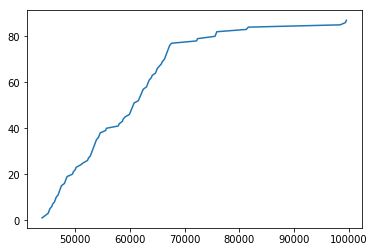

In [335]:
plt.plot(y,x)